In [4]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kiva/data-science-for-good-kiva-crowdfunding")

print("Path to dataset files:", path)

/Users/mikhail/anaconda3/envs/py313/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 41.9M/41.9M [00:05<00:00, 7.52MB/s]

Extracting files...


Path to dataset files: /Users/mikhail/.cache/kagglehub/datasets/kiva/data-science-for-good-kiva-crowdfunding/versions/5


In [6]:
import numpy as np
import pandas as pd
import math 
import missingno as msno
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
palette = plt.get_cmap('Set2')
import os

In [7]:
df_kiva_loans = pd.read_csv("kiva_loans.csv")
df_mpi = pd.read_csv("kiva_mpi_region_locations.csv")

In [8]:
df_kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [9]:
df_mpi.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


<Axes: >

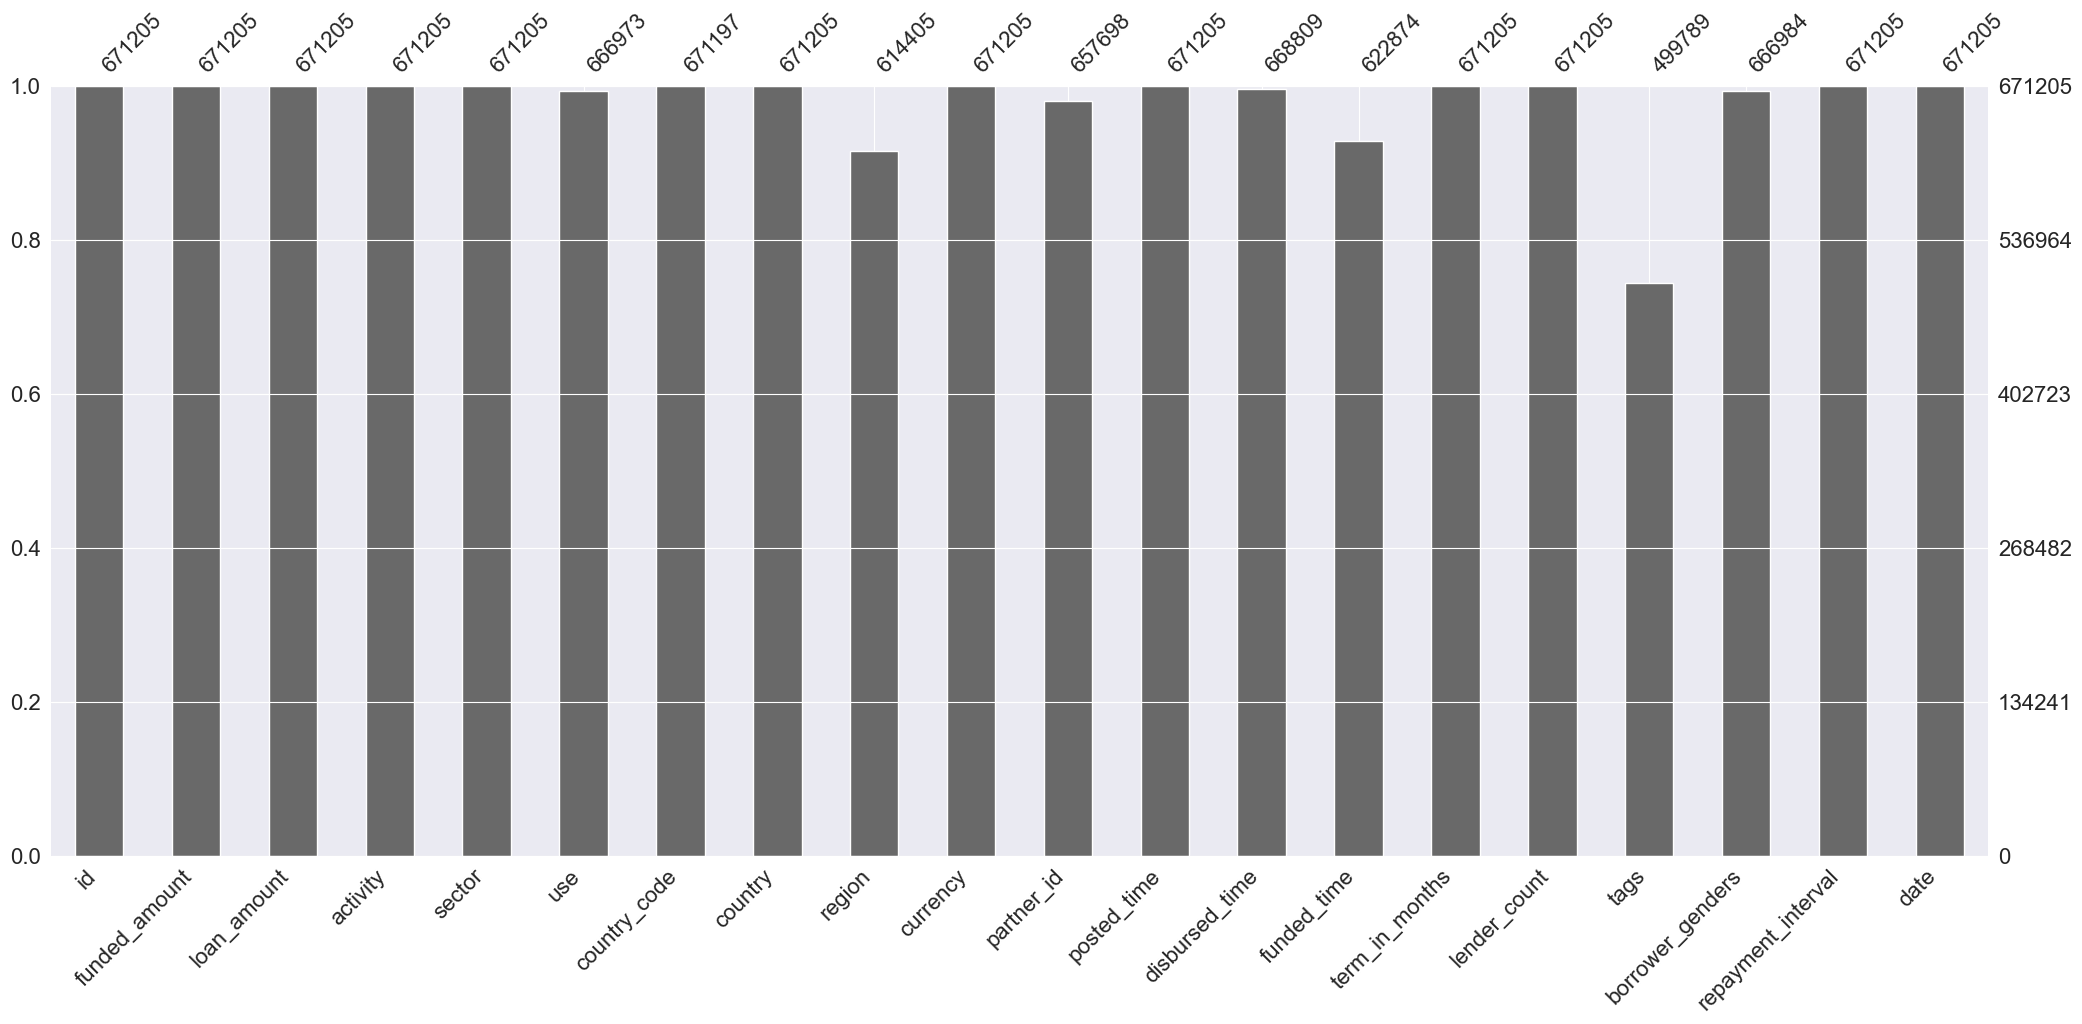

In [10]:
msno.bar(df_kiva_loans)

<Axes: >

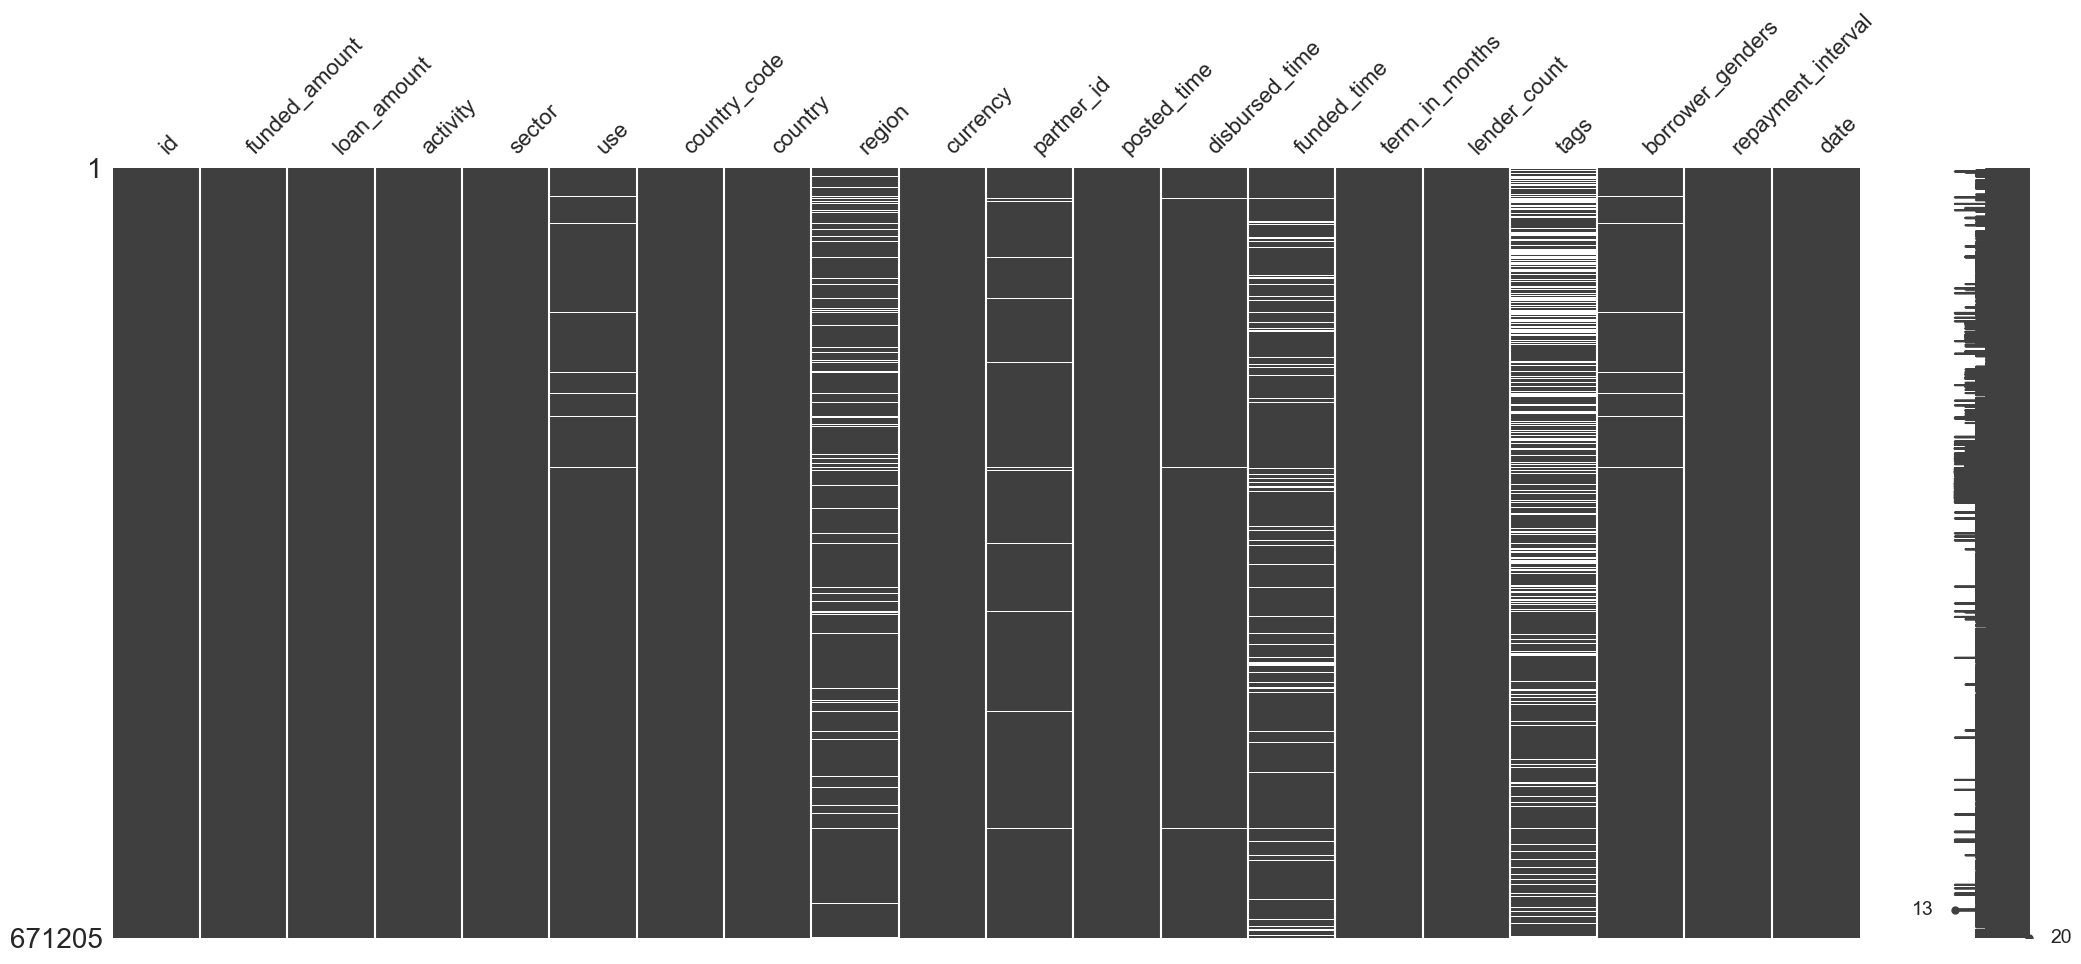

In [11]:
msno.matrix(df_kiva_loans)

In [13]:
df_kiva_loans.dtypes

id                      int64
funded_amount         float64
loan_amount           float64
activity               object
sector                 object
use                    object
country_code           object
country                object
region                 object
currency               object
partner_id            float64
posted_time            object
disbursed_time         object
funded_time            object
term_in_months        float64
lender_count            int64
tags                   object
borrower_genders       object
repayment_interval     object
date                   object
dtype: object

In [14]:
df_kiva_loans.describe(include=[np.number])

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [17]:
df_kiva_loans.describe(include=[np.object_])

,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,funded_time,tags,borrower_genders,repayment_interval,date
count,671205,671205,666973,671197,671205,614405,671205,671205,668809,622874,499789,666984,671205,671205
unique,163,15,424912,86,87,12695,67,667399,5719,498007,86719,11298,4,1298
top,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,user_favorite,female,monthly,2017-03-20
freq,72955,180302,5217,160441,160441,10000,160440,25,2800,33,27088,426502,342717,1308


In [20]:
df_kiva_loans['country'].value_counts(normalize=True) > 0.005

country
Philippines       True
Kenya             True
El Salvador       True
Cambodia          True
Pakistan          True
                 ...  
Afghanistan      False
Bhutan           False
Guam             False
Mauritania       False
Cote D'Ivoire    False
Name: proportion, Length: 87, dtype: bool

In [24]:
countries = df_kiva_loans['country'].value_counts()[df_kiva_loans['country'].value_counts(normalize=True) > 0.005]
countries

country
Philippines      160441
Kenya             75825
El Salvador       39875
Cambodia          34836
Pakistan          26857
Peru              22233
Colombia          21995
Uganda            20601
Tajikistan        19580
Ecuador           13521
Paraguay          11903
Nicaragua         11781
India             11237
Vietnam           10843
Nigeria           10136
Bolivia            8806
Lebanon            8792
Armenia            8631
Palestine          8167
Samoa              7396
Guatemala          7310
Rwanda             6735
Mali               6639
Honduras           6557
Indonesia          6214
United States      6093
Kyrgyzstan         5774
Togo               5749
Mexico             5741
Sierra Leone       5415
Tanzania           5219
Ghana              4374
Jordan             4167
Zimbabwe           4034
Madagascar         3821
Liberia            3682
Haiti              3618
Mozambique         3483
Name: count, dtype: int64

In [23]:
list_countries = list(countries.index)

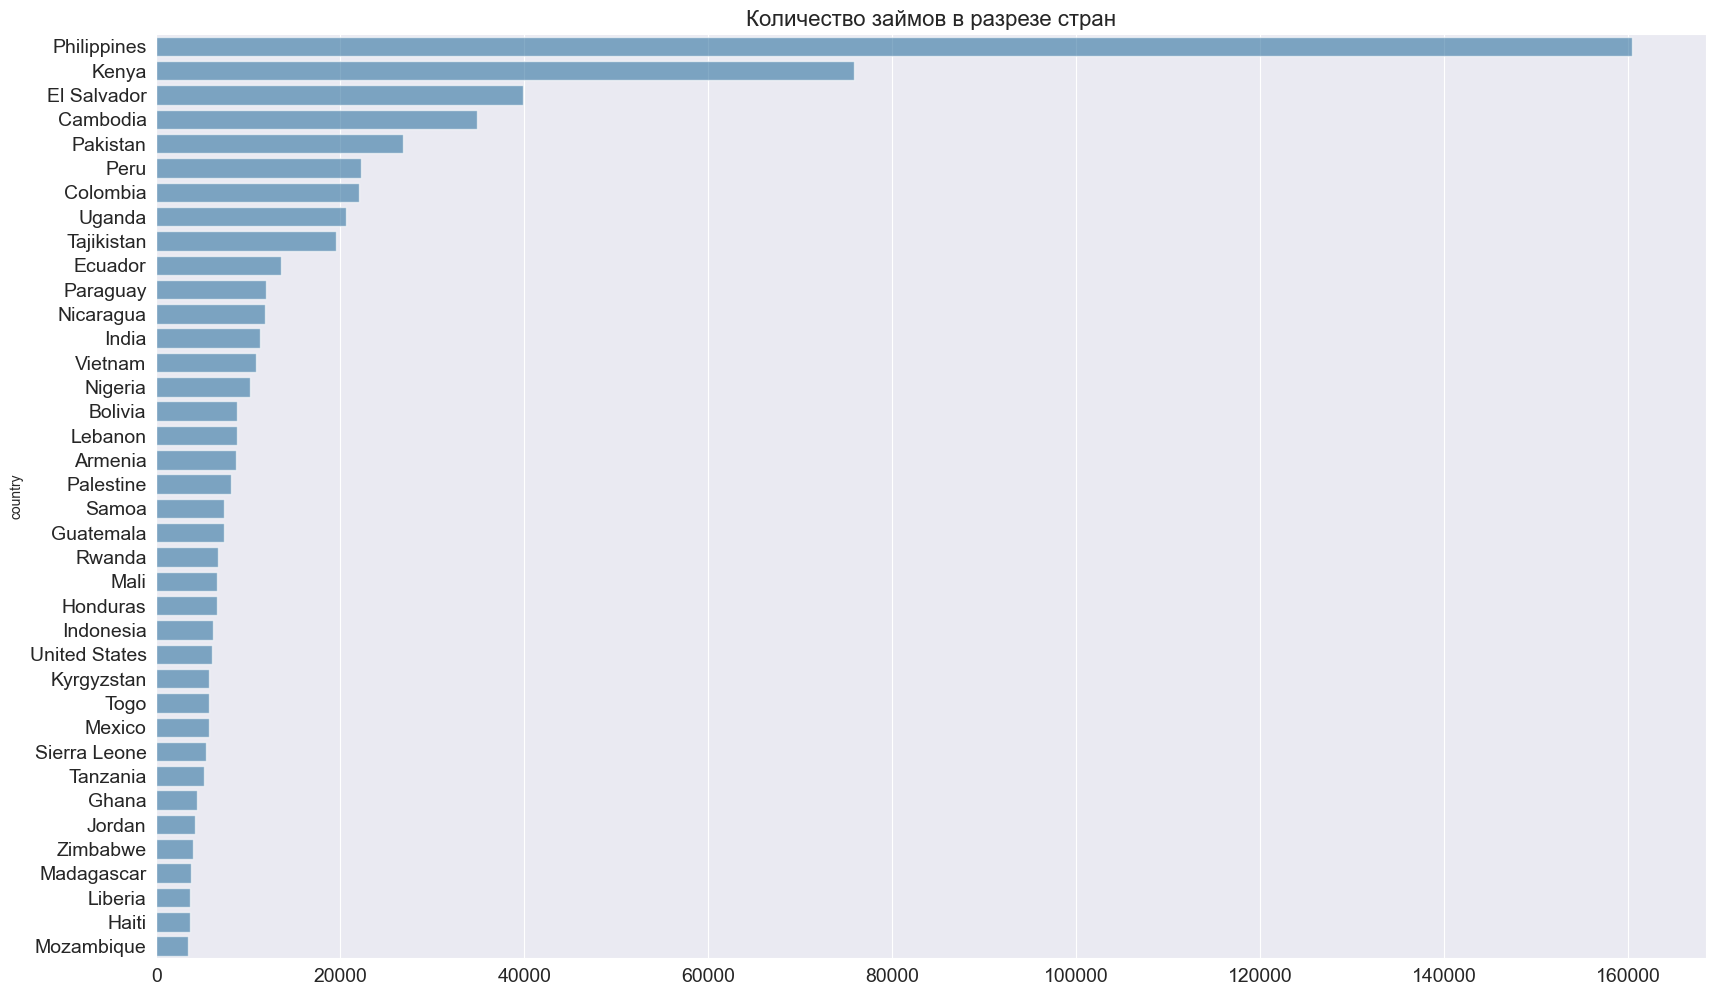

In [28]:
plt.figure(figsize=(20,12))
plt.title('Количество займов в разрезе стран',fontsize = 16)
plt.tick_params(labelsize = 14)
sns.barplot(y=countries.index,x=countries.values,alpha=.6)
plt.show()

In [29]:
df_mpi.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [36]:
df_mpi_grouped = df_mpi\
    .groupby(['ISO','country','world_region'])['MPI']\
    .mean()\
    .fillna(0)\
    .reset_index()

In [37]:
df_mpi_grouped

,ISO,country,world_region,MPI
0,AFG,Afghanistan,South Asia,0.309853
1,ALB,Albania,Europe and Central Asia,0.000000
2,ARM,Armenia,Europe and Central Asia,0.000000
3,AZE,Azerbaijan,Europe and Central Asia,0.000000
4,BDI,Burundi,Sub-Saharan Africa,0.411800
...,...,...,...,...
97,VUT,Vanuatu,East Asia and the Pacific,0.000000
98,YEM,Yemen,Arab States,0.225952
99,ZAF,South Africa,Sub-Saharan Africa,0.000000
100,ZMB,Zambia,Sub-Saharan Africa,0.312200


In [39]:
df_kiva_loans = df_kiva_loans.merge(df_mpi_grouped,how='left',on='country')
df_kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,tags,borrower_genders,repayment_interval,date,ISO_x,world_region_x,MPI_x,ISO_y,world_region_y,MPI_y
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167,PAK,South Asia,0.233167
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,NaN,"female, female",irregular,2014-01-01,PAK,South Asia,0.233167,PAK,South Asia,0.233167
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,"user_favorite, user_favorite",female,bullet,2014-01-01,IND,South Asia,0.000000,IND,South Asia,0.000000
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167,PAK,South Asia,0.233167
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,NaN,female,monthly,2014-01-01,PAK,South Asia,0.233167,PAK,South Asia,0.233167


In [42]:
regions = df_kiva_loans['world_region_x'].value_counts()
regions

world_region_x
East Asia and the Pacific      206949
Sub-Saharan Africa             162903
Latin America and Caribbean    133759
Europe and Central Asia         38827
South Asia                      38815
Arab States                      9187
Name: count, dtype: int64

In [44]:
regions_list = regions.index.to_list()
regions_list

['East Asia and the Pacific',
 'Sub-Saharan Africa',
 'Latin America and Caribbean',
 'Europe and Central Asia',
 'South Asia',
 'Arab States']

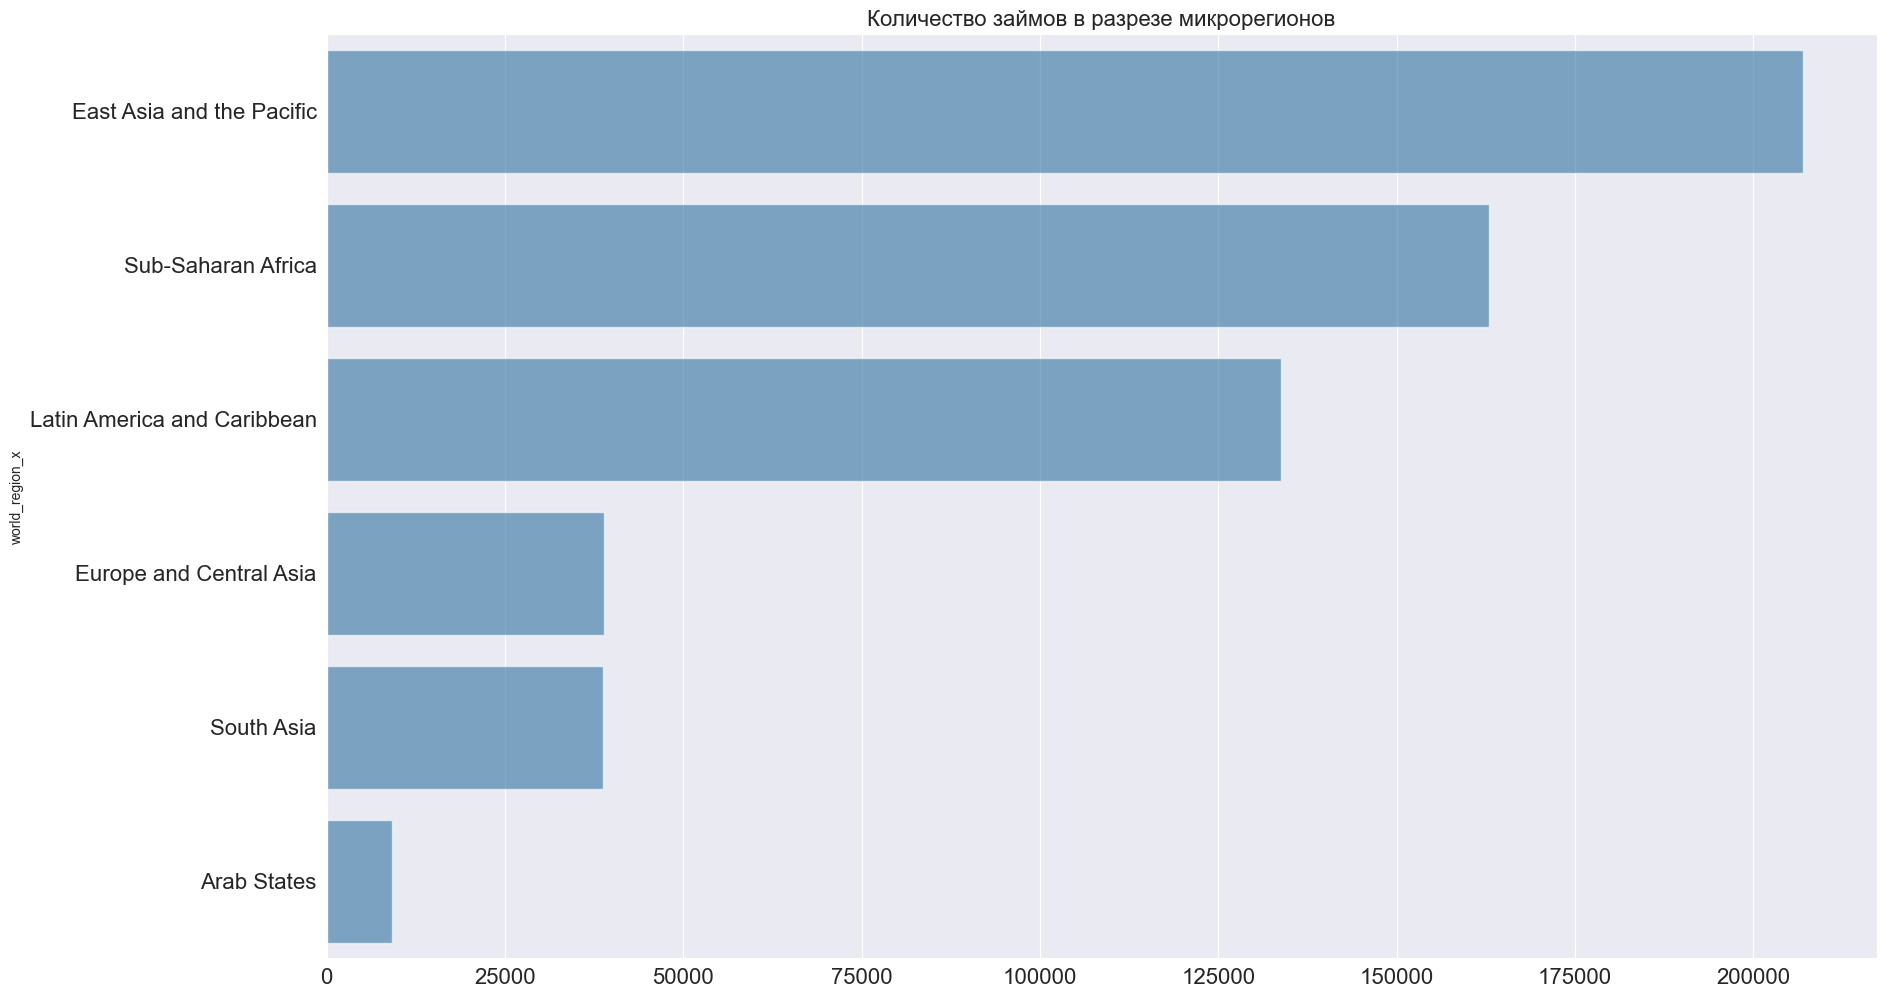

In [45]:
plt.figure(figsize=(20,12))
plt.title('Количество займов в разрезе микрорегионов',fontsize = 16)
plt.tick_params(labelsize = 16)
sns.barplot(y=regions.index,x=regions.values,alpha=.6)
plt.show()

In [46]:
df_kiva_loans['borrower_genders'].value_counts()

borrower_genders
female                                                                                                                                                                                                                          426502
male                                                                                                                                                                                                                            134710
female, female                                                                                                                                                                                                                   12164
female, female, female                                                                                                                                                                                                           11676
female, female, female, female                             

In [47]:
df_kiva_loans['borrower_genders'] = \
    [elem if elem in ['female','male'] else 'group' for elem in df_kiva_loans['borrower_genders']]

In [49]:
borrowers = df_kiva_loans['borrower_genders'].value_counts()
borrowers

borrower_genders
female    426502
male      134710
group     109993
Name: count, dtype: int64

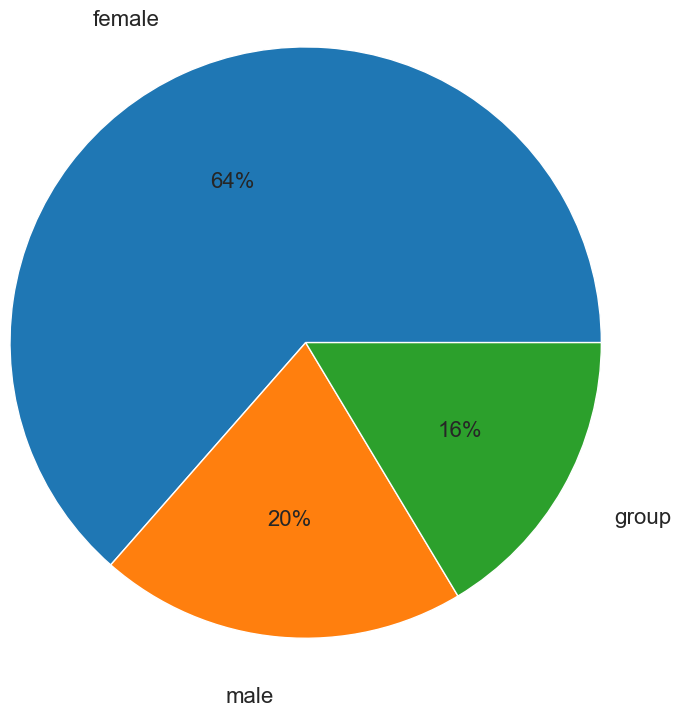

In [50]:
plot = borrowers.plot.pie(fontsize = 16, autopct = '%1.0f%%',labeldistance = 1.2,radius = 2)

In [ ]:
df_gender_by_country = \
    